# E03_카메라 스티커 앱 만들기

### 루브릭 평가기준
> 1. 자기만의 카메라앱 기능 구현을 완수하였다.
>    * 원본에 스티커 사진이 정상적으로 합성되었다.<br><br>
>2. 스티커 이미지를 정확한 원본 위치에 반영하였다.
>    * 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.<br><br>
>3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.
>   * 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.

## 시작
### 모듈 임포트

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


### 인물사진 불러오기

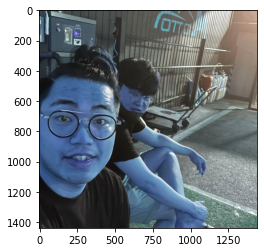

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/E03/camera_sticker/images/selfie.jpg'
face_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
face_show = face_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(face_bgr)
plt.show()

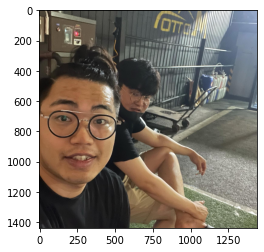

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
face_rgb = cv2.cvtColor(face_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(face_rgb)
plt.show()

### face detection 수행

In [4]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [5]:
face_rgb = cv2.cvtColor(face_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(face_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


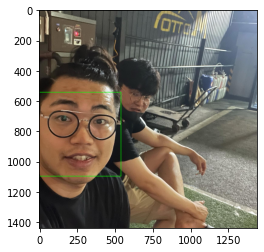

In [6]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
# print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(face_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

face_show_rgb =  cv2.cvtColor(face_show, cv2.COLOR_BGR2RGB)
plt.imshow(face_show_rgb)
plt.show()

### Landmark 생성

In [7]:
model_path = os.getenv('HOME')+'/aiffel/E03/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [8]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(face_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


[(-75, 542) (541, 1096)]


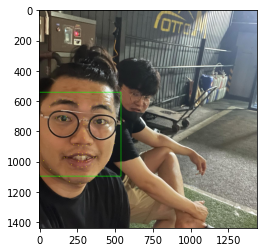

In [9]:
print(dlib_rect)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(face_show, point, 2, (0, 255, 255), -1)

face_show_rgb = cv2.cvtColor(face_show, cv2.COLOR_BGR2RGB)
plt.imshow(face_show_rgb)
plt.show()

### 수염 적용해보기

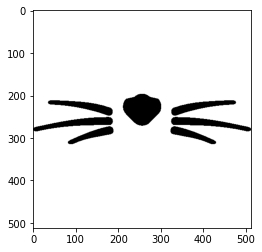

In [10]:
sticker_path = os.getenv('HOME')+'/aiffel/E03/camera_sticker/images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path)    # OpenCV로 이미지를 불러옵니다
sticker_show = img_sticker.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(sticker_show)
plt.show()

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    print('33번 랜드마크 y좌표 : ',landmark[33][1])
    y = landmark[30][1] + 20
    w = landmark[13][0] - landmark[3][0]
    h = landmark[8][1] - landmark[29][1]
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(299, 844)
33번 랜드마크 y좌표 :  896
(x,y) : (299,864)
(w,h) : (477,346)


> **처음에는 좌표를 수기로 계산해서 크기와 위치를 정해줬는데 인식된 인물 얼굴의 크기에 맞춰 삽입되도록 해보기 위해 인식된 랜드마크 기준으로 좌표와 크기를 정할 수 있게 landmark[] 좌표를 기준으로 변경해보았다. 후 다른 사진으로 시도한 경우에도 크기는 정상적으로 맞춰지는 듯 하다.**

In [12]:
sticker_path = os.getenv('HOME')+'/aiffel/E03/camera_sticker/images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))

In [13]:
refined_x = x - w//2
refined_y = y - h//2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (61,691)


In [14]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = face_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
face_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


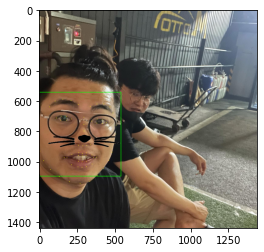

In [15]:
plt.imshow(cv2.cvtColor(face_show, cv2.COLOR_BGR2RGB))
plt.show()

### 회전
* 얼굴의 각도를 계산하고 이미지를 회전시켜 삽입해보고자 한다.
> 삼각함수의 원리로 계산하고자 했고 아크탄젠트 공식을 파이썬으로 구현해보았다.

![](./atan.png)

In [16]:
import math

x1 = landmark[57][0]
y1 = landmark[57][1]
x2 = landmark[27][0]
y2 = landmark[27][1]

def getAngle(x1, y1, x2, y2):
    rad = math.atan2(y2-y1, x2-x1)
    PI = math.pi
    angle = (rad*180)/PI
    return angle

rt = getAngle(x1, y1, x2, y2)
print(rt)

-87.91743472026913


(346, 477, 3)


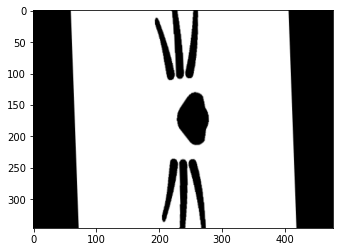

In [17]:
def rotate_image(image, angle):
    cp = (image.shape[1] / 2, image.shape[0] / 2) # 영상의 가로 1/2, 세로 1/2
    rot = cv2.getRotationMatrix2D(cp, angle, 1) 
    dst = cv2.warpAffine(image, rot, (0, 0))
    return dst

img_rotate = rotate_image(img_sticker,rt)
print(img_rotate.shape)
plt.imshow(img_rotate)
plt.show()

> 시간이 부족해 더 보완하지 못했는데 -87도의 값을 가지고 이렇게 바뀐걸 보고 (-)일 경우 시계방향으로 회전될 것이라고 예측했는데 결과 각도값에 덧,뻴셈으로 바로 세워보려고 했지만 후술할 두번째 실험에서 균등하게 적용되지 않아서 포기했다. 회전 기준을 변경하거나 계산방식을 바꿔야 하나 도무지 잘 모르겠다.

### 다른 사진으로 재실험
* 각도가 분명히 보이는 다른 사진으로 다시한번 해보기로 했다.

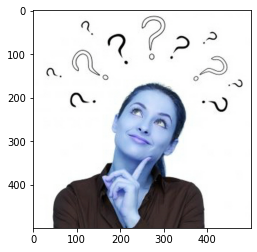

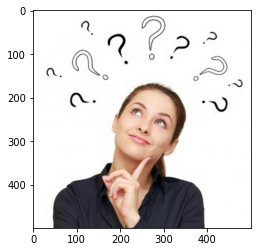

🌫🛸
🌫🛸
rectangles[[(196, 211) (325, 340)]]


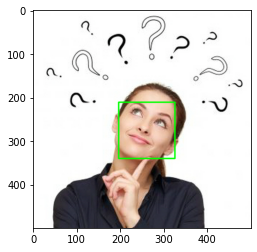

🌫🛸
68


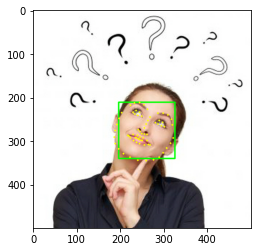

In [18]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

my_image_path = os.getenv('HOME')+'/aiffel/E03/camera_sticker/images/selfie2.jpg'
face_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
face_show = face_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(face_bgr)
plt.show()

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
face_rgb = cv2.cvtColor(face_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(face_rgb)
plt.show()

# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")
face_rgb = cv2.cvtColor(face_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(face_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(face_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

face_show_rgb =  cv2.cvtColor(face_show, cv2.COLOR_BGR2RGB)
plt.imshow(face_show_rgb)
plt.show()

model_path = os.getenv('HOME')+'/aiffel/E03/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(face_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(face_show, point, 2, (0, 255, 255), -1)

face_show_rgb = cv2.cvtColor(face_show, cv2.COLOR_BGR2RGB)
plt.imshow(face_show_rgb)
plt.show()

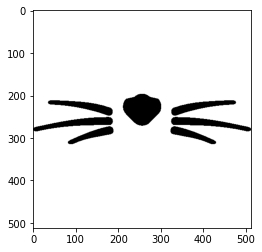

(255, 270)
33번 랜드마크 y좌표 :  283
(x,y) : (255,290)
(w,h) : (110,76)
(x,y) : (200,252)


In [19]:
sticker_path = os.getenv('HOME')+'/aiffel/E03/camera_sticker/images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path)    # OpenCV로 이미지를 불러옵니다
sticker_show = img_sticker.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(sticker_show)
plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    print('33번 랜드마크 y좌표 : ',landmark[33][1])
    y = landmark[30][1] + 20
    w = landmark[13][0] - landmark[3][0]
    h = landmark[8][1] - landmark[29][1]
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

sticker_path = os.getenv('HOME')+'/aiffel/E03/camera_sticker/images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
refined_x = x - w//2
refined_y = y - h//2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

-61.87626461671118
(76, 110, 3)


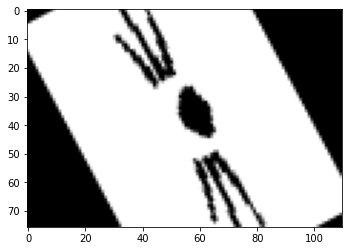

In [20]:
import math

x1 = landmark[57][0]
y1 = landmark[57][1]
x2 = landmark[27][0]
y2 = landmark[27][1]

def getAngle(x1, y1, x2, y2):
    rad = math.atan2(y2-y1, x2-x1)
    PI = math.pi
    angle = (rad*180)/PI
    return angle

rt = getAngle(x1, y1, x2, y2)
print(rt)

def rotate_image(image, angle):
    cp = (image.shape[1] / 2, image.shape[0] / 2) # 영상의 가로 1/2, 세로 1/2
    rot = cv2.getRotationMatrix2D(cp, angle, 1) 
    dst = cv2.warpAffine(image, rot, (0, 0))
    return dst

img_rotate = rotate_image(img_sticker,rt)
print(img_rotate.shape)
plt.imshow(img_rotate)
plt.show()

> 두번째 실험으로 다시 봐도 기준을 잘 모르겠다. (-)일 때 시계방향이라는 것이 가장 타당한 것 같은데 이를 y축 기준으로 보정할 수 있는 방법을 끝내 찾지 못했다. 그리고 원인은 알 수 없지만 이번 이미지는 해상도가 낮아진 듯 보인다.

슝~


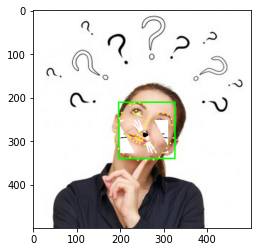

In [22]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = face_show[refined_y:refined_y+img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]]
face_show[refined_y:refined_y+img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]] = \
    np.where(img_rotate==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

plt.imshow(cv2.cvtColor(face_show, cv2.COLOR_BGR2RGB))
plt.show()

> 아무튼 회전이 되기도 하고 위치나 크기는 의도된 대로 붙여지긴 하는데 새로운 문제가 생겼다. 돌아간 이미지가 흰색으로 보인다. 지금 처리된 것이 정확하게 이미지가 돌아간 게 아니라 기존 이미지에서 회전시킨 새로운 영역을 새로 출력해낸 것으로 보여지는데 이 또한 결국 찾아내지 못했다. 어쩌면 라이브러리 자체를 잘못 사용한 것 같기도 하다.

# 회고
### 어렵다
**여전히 매우 어려운 내용들이다. 내용은 계속 어려워지고 진도 속도는 그대로니까 점점 감당하기 힘들어지는 것 같다.
<br>
그나마 다행인 것은 그래도 노드의 내용들을 계속해서 뜯어보며 코드를 찾아내고, 사용할 라이브러리나 메서드들을 찾아내서 사용해본다는 것 정도? 코딩에 완전한 문외한이였던 나에게는 그래도 발전이 없진 않구나 하고 위안을 얻는다. 강산 퍼실님의 힌트 덕에 삼각함수를 생각해 적용해본 것도 좋았다. 결국 해결하진 못했지만.**
<br>
### 아마도
**계속 학습하면서 중복된 내용이 나오거나 내가 좀 더 익숙해지면 지금까지 진행하면서 남은 많은 의문점들이 리마인드될 것 같다. 조금 시간이 지난 다음에 노드들을 싹 리뷰해보는 시간을 따로 가져봐야겠다.**
##### ps. 너무 지쳐서 도저히 긴 회고를 남길 수가 없다. 설까지만 버티고 설 연휴를 이용해서 밀린 노드와 개인스케쥴까지 싹 정리해야 여유가 생길 듯 싶다.

#### ref.
* cv2.resize<br>
https://076923.github.io/posts/Python-opencv-8/
<br>
<br>
* image bitwise<br>
https://opencv-python.readthedocs.io/en/latest/doc/07.imageArithmetic/imageArithmetic.html\
<br>
<br>
* 각도<br>
https://bemong1.wixsite.com/main/single-post/2015/03/10/%EC%96%BC%EA%B5%B4-%EC%88%98%EC%A7%81-%ED%9A%8C%EC%A0%84%EB%B0%A9%ED%96%A5-%EA%B2%80%EC%B6%9C
https://pythonq.com/so/python/394021
https://velog.io/@dldndyd01/OpenCV-%EC%9D%B4%EB%AF%B8%EC%A7%80-%ED%9A%8C%EC%A0%84%EC%A4%91%EC%95%99-%EA%B8%B0%EC%A4%80-%ED%9A%8C%EC%A0%84-cv2.getRotationMatrix2D-%EC%96%BC%EA%B5%B4-%ED%9A%8C%EC%A0%84-%EA%B0%81%EB%8F%84-%EA%B5%AC%ED%95%98%EA%B8%B0
https://blog.naver.com/PostView.naver?blogId=rheesungjun&logNo=222366320312&parentCategoryNo=&categoryNo=23&viewDate=&isShowPopularPosts=true&from=search
https://blog.naver.com/PostView.naver?blogId=heennavi1004&logNo=222031099948&parentCategoryNo=&categoryNo=82&viewDate=&isShowPopularPosts=true&from=search
http://www.gisdeveloper.co.kr/?p=6490